# Исследование объявлений о продаже квартир

В распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. задача - установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10)) 
data.info()

import warnings
warnings.filterwarnings('ignore')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
# минимальная и максимальная цена квартиры. данные нужны для понимания 
# степени округления этих чисел
print('Минимальная цена', data['last_price'].min())
print('Максимальная цена', data['last_price'].max())

Минимальная цена 12190.0
Максимальная цена 763000000.0


### Вывод

Описание данных и комментарии по последующей их обработке.

•	total_images           
 — число фотографий квартиры в объявлении.

•	last_price             
— цена на момент снятия с публикации.
Исходя из данных о максимальной и минимальной цене, округлить данные до сотен тысяч рублей, данные указывать в миллионах рублей. 

•	total_area              
— площадь квартиры в квадратных метрах (м².)

•	first_day_exposition   
— дата публикации.
Перевести формат написания в более удобочитаемый. Округлить данные до дней, выявить день недели подачи объявления.

•	rooms                  
— число комнат.

•	ceiling_height          
 — высота потолков (м).
В данных есть пропуски. Вероятно, пропуски объясняются стандартностью высоты потолков, податель объявления не посчитал этот параметр уникальным и существенным. Пропуски заменить средним значением.

•	floors_total           
— всего этажей в доме.
    Долей номера этажа не бывает. Тип данных перевести в целочисленный тип. Небольшое количество пропусков в данных может объясняться одноэтажностью здания. Нужно в дальнейшем уточнить.

•	living_area             
 — жилая площадь в квадратных метрах (м².)
 В данных немало пропусков. На данном этапе не ясно по какой причине пропуски.

•	floor                 
— этаж.

•	is_apartment           
— апартаменты (булев тип). Очень много пропусков. Вероятнее всего, пропуски можно заменить на значение False.

•	studio                 
— квартира-студия (булев тип).

•	open_plan              
— свободная планировка (булев тип).

•	kitchen_area            
 — площадь кухни в квадратных метрах (м²).
Есть существенное количество пропусков. Вероятно, нет данных для квартир-студий. Далее уточнить, если версия подтвердиться, пропуски заменить нулями.

•	balcony                
— число балконов.
Долей числа балконов не бывает. Тип данных перевести в целочисленный тип. Пропуски в данных вероятнее всего указывают на отсутствие балконов. Пропуски заменить на ноль.

•	locality_name           
— название населённого пункта.
Число пропусков незначительно, чем объясняются на данном этапе не ясно. Нужно вывести все наименования, для избежания повторов и псевдоуникальных значений, привести к единообразному написанию.

•	airports_nearest       
— расстояние до ближайшего аэропорта в метрах (м).
Такая точность не нужна. Данные нужно округлить до километров. Тип данных перевести в целочисленный тип. Пропуски в данных могут объясняться тем, что податель объявления не посчитал нужным указывать этот параметр. Пропуски заменить средним значением, взятым для такого же населённого пункта (в случае СПб будет большая погрешность, поэтому для СПб брать среднее значение, соответствующее удалённости от центра, что тоже не гарантирует точности, т.к. от центра можно удаляться в разные стороны). 

•	cityCenters_nearest     
— расстояние до центра города (м).
Такая точность не нужна. Данные нужно округлить до сотен метров. С пропусками поступить аналогично пропускам в столбце airports_nearest. Указывать данные в километрах. Неканоничное наименование столбца, нужно переименовать.

•	parks_around3000        
 — число парков в радиусе 3 км.
Долей числа парков не бывает. Тип данных перевести в целочисленный тип. Пропуски в данных вероятнее всего указывают на отсутствие парков. Пропуски заменить на ноль.

•	parks_nearest           
 — расстояние до ближайшего парка (м).
Такая точность не нужна. Данные нужно округлить до сотен метров. Указывать данные в километрах. Пропусков в данных значительно больше, чем в столбце parks_around3000. Вероятнее всего податель объявления мог не посчитать нужным указать эти данные или не знал этих данных. После обработки столбца parks_around3000, вероятнее всего, пропуски нужно заменить на средние значения по населённому пункту или району СПб, аналогично данным столбца airports_nearest. 

•	ponds_around3000        
— число водоёмов в радиусе 3 км.
Долей числа водоёмов не бывает. Тип данных перевести в целочисленный тип. Пропуски в данных вероятнее всего указывают на отсутствие водоёмов. Пропуски заменить на ноль.

•	ponds_nearest           
— расстояние до ближайшего водоёма (м).
Такая точность не нужна. Данные нужно округлить до сотен метров. Указывать данные в километрах. Пропусков в данных значительно больше, чем в столбце ponds_around3000. Вероятнее всего податель объявления мог не посчитать нужным указать эти данные или не знал этих данных. После обработки столбца ponds_around3000, вероятнее всего, пропуски нужно заменить на средние значения по населённому пункту или району СПб, аналогично данным столбца airports_nearest. 

•	days_exposition        
— сколько дней было размещено объявление (от публикации до снятия).
Тип данных перевести в целочисленный тип. Пропущенные значения на этом этапе оставить без изменений.




## Предобработка данных

In [3]:
# перевод в миллионы рублей, округление данных 
data['last_price'] = data['last_price'] / 1000000
data['last_price'] = round(data['last_price'], 1)
data['last_price'].head()

0    13.0
1     3.4
2     5.2
3    64.9
4    10.0
Name: last_price, dtype: float64

In [4]:
# перевод формата даты в удобочитаемый
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [5]:
# добавление стобца с днём недели подачи объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['weekday_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday_exposition, dtype: int64

In [6]:
# просмотр строчек таблицы, в которых не указана этажность здания
display(data[data['floors_total'].isna()].head(10)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition
186,12,11.6,65.20,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,1
237,4,2.4,28.10,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,2
457,4,9.8,70.80,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,5
671,4,6.1,93.60,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,3
1757,5,3.6,39.00,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,5
1930,1,9.8,66.77,2016-05-13,2,NaN,NaN,NaN,4,NaN,...,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0,4
2392,7,5.4,53.00,2017-06-29,2,NaN,NaN,29.00,22,NaN,...,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0,3
2846,4,2.3,27.80,2016-09-21,1,NaN,NaN,19.40,15,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0,2
2952,10,6.5,54.30,2019-04-23,1,NaN,NaN,22.20,6,NaN,...,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,1
3031,9,6.4,56.70,2018-03-27,2,NaN,NaN,32.00,12,NaN,...,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0,1


Версия о том, что этажность здания (всего этажей) не указана там, где квартира на первом и единственном этаже не подтвердилась. Из приведённой части таблицы видно, что такие квартиры могут находится на любых этажах. По какой-то причине эти пропуски совпадают со строчками без данных о  высоте потолков.
Отсюда следует, что заполнить пропуски в столбце ceiling_height (высота потолков) рассчитанной средней величиной, в соответствии с этажностью здания не получится.
Зная о реалиях строительства и отстутвии такого понятия, как "соблюдение этажности возводимых зданий", т.е. зная, что 20-ти этажный дом может строится рядом с двухэтажным, восстанавливать пропуски в столбце floors_total сколько-нибудь верифицируемым способом не получается. Если дальнейшая работа заставит заполнить пропуски, то можно заменять любым доступным способом - средней величиной, медианной или просто фиксированной величиной - это всё одинаково неверно.

На данном этапе пропуски в столбцах floors_total (всего этажей) оставляю.

Изучим данные столбца о высоте потолка. 

In [7]:
# данные о значениях высоты потолков
print('Минимальная высота потолка', data['ceiling_height'].min())
print('Максимальная высота потолка ', data['ceiling_height'].max())
print('Средняя высота потолка', data['ceiling_height'].mean())
print('Медианная высота потолка', data['ceiling_height'].median())

Минимальная высота потолка 1.0
Максимальная высота потолка  100.0
Средняя высота потолка 2.77149889685604
Медианная высота потолка 2.65


Минимальная и максимальная высоты потолка имеют неадекватные значения. Но, видимо, таких значений немного, т.к. среднее и медианное адекватны и различие между этими значениями незначительно.

Опираясь на жизненный опыт, можно сказать, что высота потолков примерно одинакова, поэтому все пропущенные значения заменяю на медианное значение.

In [8]:
# замена пропущенных значений столбца ceiling_height
data['ceiling_height']= data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].head()

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64

In [9]:
# просмотр строчек таблицы, в которых не указана жилая площадь квартиры
display(data[data['living_area'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition
3,0,64.9,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4
7,5,7.9,71.6,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3
30,12,2.2,32.8,2018-02-19,1,2.65,9.0,NaN,2,NaN,...,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,0
37,10,2.0,45.8,2017-10-28,2,2.50,5.0,NaN,1,NaN,...,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,5
44,13,5.4,40.0,2018-11-18,1,2.65,22.0,NaN,3,NaN,...,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,6


На этом этапе не видно никакой видимой и явной причины пропуска значений жилой площади. Следующим шагом заменяю пропущенные значения жилой площади квартиры медианным в соответствии  с общей площадью квартиры.

In [10]:
# замена пропущенных значений living_area
for area in data['total_area'].unique():
    median = data.loc[data['total_area'] == area, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['total_area'] == area), \
    'living_area'] = median

# первая замена не обеспечивает заполнение всех пропусков. оставшиеся заменяю данными, 
# исходя из количества комнат в квартире    
for area_1 in data['rooms'].unique():
    median = data.loc[data['rooms'] == area_1, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == area_1), \
    'living_area'] = median   
    
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3
1,7,3.4,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1
2,10,5.2,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3
3,0,64.9,159.0,2015-07-24,3,2.65,14.0,95.0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,4
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,1


In [11]:
# замена пропущенных значенй столбца is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

In [12]:
# исходя из предпосылки, что в квартирах-студиях и апартаментах нет кухонь в виде отдельных 
# помещений, заменяю пропуски столбца kitchen_area в таких квартирах нулями
data.loc[(data['kitchen_area'] == 'NaN') 
       & (data['is_apartment'] == True), 'kitchen_area'] = 0

data.loc[(data['kitchen_area'] == 'NaN') 
       & (data['studio'] == True), 'kitchen_area'] = 0

# замена остальных пропущенных значений исходя из количества комнат в квартире 
for area_1 in data['rooms'].unique():
    median = data.loc[data['rooms'] == area_1, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == area_1), \
    'kitchen_area'] = median 

# предыдущие замены не обеспечивает заполнение всех пропусков. оставшиеся заменяю данными, 
# отталкиваяь от общей площади квартиры
for area in data['total_area'].unique():
    median = data.loc[data['total_area'] == area, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['total_area'] == area), \
    'kitchen_area'] = median    
    
    
data['kitchen_area'].head()    

0    25.0
1    11.0
2     8.3
3     9.5
4    41.0
Name: kitchen_area, dtype: float64

In [13]:
# замена пропущенных значений столбца balcony на ноль и замена типа данных
data['balcony'] = data['balcony'].fillna(0).astype(int)  
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

In [14]:
# просмотр топонимов, указанных в таблице. 
data['locality_name'].value_counts().head(30)

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
Колпино                      338
посёлок Парголово            327
Гатчина                      307
деревня Кудрово              299
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Кудрово                      173
деревня Новое Девяткино      144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Сланцы                       112
Волхов                       111
Тосно                        104
Кингисепп                    104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
посёлок Бугры                 69
Приозерск                     66
Name: loca

По всей видимости, названия населённых пунктов записаны корректно. Необходимости в переименовании нет. Замена "посёлок" на "поселок" или наоборот не имеет значения, т.к. нет одинаковых топонимов с различным написанием типа топонима, дубликаты таким образом не образуются.

In [15]:
# замена пропущенных значений столбца airports_nearest
for locality in data['locality_name'].unique():
    mean = data.loc[data['locality_name'] == locality, 'airports_nearest'].mean()
    data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == locality), \
    'airports_nearest'] = mean

# после первой замены остаётся ещё много пропусков, поэтому оставшиеся пропуски заполняю 
# одним средним значением    
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].mean()

# изменение единиц измерения расстояния на километры
data['airports_nearest'] = (data['airports_nearest'] / 1000).astype(int) 

# ближайшее пропущенное значение в исходной таблице было в 6-ой строке. Для контроля выполнения 
# всех команд смотрим строку с индексом 5
data['airports_nearest'].head(6)

0    18
1    12
2    21
3    28
4    31
5    28
Name: airports_nearest, dtype: int64

После обработки значения столбца расстояния до ближайшего аэропорта указаны в километрах, пропущенные значения заменены.

In [16]:
# переименование столбца в соответствии с этикетом
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

# замена пропущенных значений расстояний до центра города
for locality in data['locality_name'].unique():
    mean = data.loc[data['locality_name'] == locality, 'city_centers_nearest'].mean()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality), \
    'city_centers_nearest'] = mean
    
# после первой замены остаётся ещё много пропусков, поэтому оставшиеся пропуски заполняю 
# одним средним значением    
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].mean()    
    
# изменение единиц измерения расстояния на километры 
data['city_centers_nearest'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest'] = round(data['city_centers_nearest'], 0)

data['city_centers_nearest'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest, dtype: float64

In [17]:
# замена пропущенных значений столбца parks_around3000 на ноль и замена типа данных
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)  
data['parks_around3000'].head()

0    1
1    0
2    1
3    2
4    2
Name: parks_around3000, dtype: int64

In [18]:
# замена пропущенных значений расстояний до парка
for locality in data['locality_name'].unique():
    mean = data.loc[data['locality_name'] == locality, 'parks_nearest'].mean()
    data.loc[(data['parks_nearest'].isna()) & (data['locality_name'] == locality), \
    'parks_nearest'] = mean

# после первой замены остаётся ещё много пропусков, поэтому оставшиеся пропуски заполняю 
# одним средним значением    
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].mean()    

# замена единиц измерения, расстояние делаю в километрах, расстояния округляю
data['parks_nearest'] = data['parks_nearest'] / 1000
data['parks_nearest'] = round(data['parks_nearest'], 1)

data['parks_nearest'].head()

0    0.5
1    0.5
2    0.1
3    0.1
4    0.1
Name: parks_nearest, dtype: float64

In [19]:
# замена пропущенных значений столбца ponds_around3000 на ноль и замена типа данных
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)  
data['ponds_around3000'].head()

0    2
1    0
2    2
3    3
4    1
Name: ponds_around3000, dtype: int64

In [20]:
# замена пропущенных значений расстояний до водоёма

for locality in data['locality_name'].unique():
    mean = data.loc[data['locality_name'] == locality, 'ponds_nearest'].mean()
    data.loc[(data['ponds_nearest'].isna()) & (data['locality_name'] == locality), \
    'ponds_nearest'] =   mean

# после первой замены остаётся ещё много пропусков, поэтому оставшиеся пропуски заполняю 
# одним средним значением    
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].mean()    

# замена единиц измерения, расстояние делаю в километрах, расстояния округляю
data['ponds_nearest'] = data['ponds_nearest'] / 1000
data['ponds_nearest'] = round(data['ponds_nearest'], 1) 
   
data['ponds_nearest'].head()

0    0.8
1    0.6
2    0.6
3    0.2
4    0.0
Name: ponds_nearest, dtype: float64

В предыдущих ячейках сменил количественные данные на целочисленный тип. Также, изменил единицы измерений расстояний на километры с последующим округлением. В некоторых строчках получились расстояния 0.0 км, т.к. округение идёт по математическим правилам. Буду помнить, что 0.0 км - это расстояние менее 50 метров, что в моём случае означает дом на берегу водоёма и/или на границе парка - ничего противоречащего здравому смыслу. 

Пропущенные значения столбца city_centers_nearest - буду считать, что значния столбца city_centers_nearest аналогичны расстоянию до аэропорта, т.е. один центр на все населённые пункты, центр города - центр города Санкт-Петербург. 	

In [21]:
# замена пропущенных значений столбца days_exposition
for date in data['days_exposition']:
    data.loc[data['days_exposition'].isna(), 
    'days_exposition'] = (data['first_day_exposition'].max() - data['first_day_exposition']).dt.days

data['days_exposition'].head()

0     57.0
1     81.0
2    558.0
3    424.0
4    121.0
Name: days_exposition, dtype: float64

Логика замены пропусков в днях размещения объявления (столбец days_exposition) следующая: если нет длительности жизни объявления, то оно не было закрыто на момент подготовки выгрузки данных. Т.о, пусть дата выгрузки данных совпадает с датой открытия самого нового объявления в таблице. Поэтому, считаем датой выгрузки самую позднюю дату, отнимаем от нее дату создания объявления и получаем длительность жизни объявлений для ситуаций, когда они пропущены.

ВЫВОД ТАБЛИЦЫ ПОСЛЕ ПЕРВИЧНОЙ ОБРАБОТКИ ДАННЫХ

In [22]:
display(data.head(10)) 
data.info()
print()
print('Дублированных данных в таблице:', data.duplicated().sum()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition
0,20,13.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,Санкт-Петербург,18,16.0,1,0.5,2,0.8,57.0,3
1,7,3.4,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2,посёлок Шушары,12,19.0,0,0.5,0,0.6,81.0,1
2,10,5.2,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0,Санкт-Петербург,21,14.0,1,0.1,2,0.6,558.0,3
3,0,64.9,159.00,2015-07-24,3,2.65,14.0,95.00,9,False,...,0,Санкт-Петербург,28,7.0,2,0.1,3,0.2,424.0,4
4,2,10.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,Санкт-Петербург,31,8.0,2,0.1,1,0.0,121.0,1
5,10,2.9,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,городской посёлок Янино-1,28,14.0,0,0.5,0,0.5,55.0,0
6,6,3.7,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1,посёлок Парголово,52,19.0,0,0.5,0,0.6,155.0,3
7,5,7.9,71.60,2019-04-18,2,2.65,24.0,44.30,22,False,...,2,Санкт-Петербург,23,12.0,0,0.5,0,0.5,15.0,3
8,20,2.9,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,посёлок Мурино,28,14.0,0,0.5,0,0.5,189.0,2
9,18,5.4,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,Санкт-Петербург,50,15.0,0,0.5,0,0.5,289.0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23667 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        23699 non-null int64
city_centers_nearest    23699 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3

Данные приведены в порядок. Очень небольшое число пропусков в столбцах: floors_total, locality_name, заполнять которые нечем.

Дублированных данных в явном виде в таблице нет. 

## Расчёты и добавление результатов в таблицу

In [23]:
# расчёт и добавление показателей, связанных с площадью квартир

# цена квадратного метра в млн.рублей
data['sq_m_price'] = data['last_price'] / data['total_area']

# отношение жилой к общей площади квартиры
data['living_vs_total'] = data['living_area'] / data['total_area']

# отношение площади кухни к общей площади квартиры
data['kitchen_vs_total'] = data['kitchen_area'] / data['total_area']

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total
0,20,13.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16.0,1,0.5,2,0.8,57.0,3,0.120370,0.472222,0.231481
1,7,3.4,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,19.0,0,0.5,0,0.6,81.0,1,0.084158,0.460396,0.272277
2,10,5.2,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,14.0,1,0.1,2,0.6,558.0,3,0.092857,0.612500,0.148214
3,0,64.9,159.0,2015-07-24,3,2.65,14.0,95.0,9,False,...,7.0,2,0.1,3,0.2,424.0,4,0.408176,0.597484,0.059748
4,2,10.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8.0,2,0.1,1,0.0,121.0,1,0.100000,0.320000,0.410000


Дату я перевёл в нормальный вид на предыдущем этапе, тогда же добавил столбец weekday_exposition - день недели подачи объявления, где 0 - понедельник, 1 -вторник и т.д.

In [24]:
# функция, придающая статус этажу
def floor_sort(row):
    if row['floor'] == 1: 
        return 'первый'
    if row['floor'] == row['floors_total']: 
        return 'последний'
    return 'другой'
data['floor_sort'] = data.apply(floor_sort, axis = 1)

data['floor_sort'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_sort, dtype: object

## Исследовательский анализ данных

Минимальная цена квартиры 0.0 миллионов рублей
Максимальная цена квартиры 763.0 миллионов рублей
Медианная цена квартиры 4.6 миллионов рублей


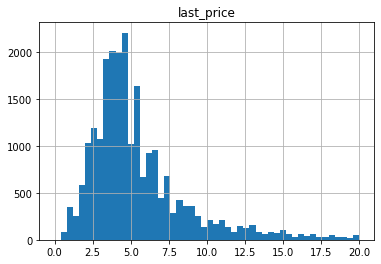

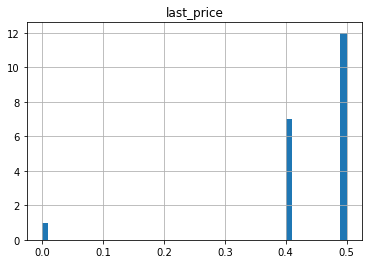

In [25]:
# построение гистограмм

# Почти все гистограммы имеют длинные хвосты в сторону больших значений
# дабы не строить много гистограмм на разные диапазоны цен, площадей и пр.,
# рядом вывожу максимальные и минимальные значения параметров. 

# гистограмма - цена квартиры 
data.hist('last_price', bins=50, range=(0, 20))
data.hist('last_price', bins=50, range=(0, 0.5))
print('Минимальная цена квартиры', data['last_price'].min(), 'миллионов рублей')
print('Максимальная цена квартиры', data['last_price'].max(), 'миллионов рублей')
print('Медианная цена квартиры', data['last_price'].median(), 'миллионов рублей')

Изучение параметра last_price - цена квартиры на момент сделки.

Медианная цена квартиры 4.6 миллионов рублей - адекватное значение с учётом текущей инфляции.
Максимальная цена квартиры 763.0 миллионов рублей - также, адекватное значение для огромной квартиры в СПб.

Гистограмма показала одну квартиру за 0 рублей. На первом этапе этой работы я округлил цены с шагом 100 тысяч рублей. Без округления минимальная цена квартиры - 12190.0 рублей, что также неадекватно низкая цена даже для глухих и заброшенных населённых пунктов. Либо, это цена не продажи квартиры, а аренды, например.

Также, гистограмма показывает наличие семи квартир по 400 тысяч рублей, 12-ти квартир по 500 тысяч рублей, что является крайне низкими ценами, возможными только для экстремально плохих состояний квартир, малой их площади, удалённости, явно находящихся вне города СПб. 
Гистограмма для цен более 500 тысяч рублей и более не строилась, т.к. при определённых условиях, такие цены возможны, хоть и также крайне низки.


In [26]:
# просмотр строчек таблицы с экстремально дешёвыми квартирами
display(data.loc[data['last_price'] == 0])

display(data.loc[data['last_price'] == 0.4])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
8793,7,0.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,1,0.8,0,0.5,8.0,2,0.0,0.293578,0.37156,последний


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
5698,7,0.4,42.0,2017-07-31,2,2.65,1.0,23.00,1,False,...,0,0.5,0,0.5,233.0,0,0.009524,0.547619,0.138095,первый
9581,7,0.4,43.4,2018-08-31,2,2.65,5.0,30.30,3,False,...,0,0.5,0,0.5,96.0,4,0.009217,0.698157,0.126728,другой
14911,5,0.4,54.0,2018-06-26,2,2.65,3.0,31.00,3,False,...,0,0.5,0,0.5,44.0,1,0.007407,0.574074,0.162963,последний
16219,14,0.4,38.5,2018-07-11,2,2.65,2.0,18.25,1,False,...,0,0.5,0,0.5,45.0,2,0.010390,0.474026,0.228571,первый
16274,18,0.4,40.0,2018-07-10,1,2.65,5.0,18.00,1,False,...,0,0.5,0,0.5,45.0,1,0.010000,0.450000,0.226000,первый
17456,7,0.4,30.4,2019-04-22,1,2.65,2.0,16.00,1,False,...,0,0.5,0,0.5,11.0,0,0.013158,0.526316,0.197368,первый
17676,0,0.4,36.5,2018-02-01,1,2.65,5.0,17.30,4,False,...,0,0.5,0,0.5,120.0,3,0.010959,0.473973,0.232877,другой


In [27]:
# просмотр названий населёных пунктов с экстремально дешёвыми квартирами
print('Квартира за 12 тыс. рублей находится в', data.loc[8793, 'locality_name'])
print()
print('Квартиры за 400 тыс. рублей находятся в')
print(data.loc[(5698, 9581, 14911, 16219, 16274, 17456, 17676), 'locality_name'])


Квартира за 12 тыс. рублей находится в Санкт-Петербург

Квартиры за 400 тыс. рублей находятся в
5698     городской посёлок Будогощь
9581             деревня Старополье
14911         посёлок станции Свирь
16219          деревня Вахнова Кара
16274            деревня Старополье
17456                        Сланцы
17676             деревня Ям-Тесово
Name: locality_name, dtype: object


Квартира за 12 тысяч рублей имеет общую площадь более 100 квадратных метров, и находится в Санкт-Петербурге. Никаким аварийным состоянием, удалённостью от центра города и любой инфраструктуры такая низкая цена объясятся не может. Арендная плата также очень низкая. Делаю вывод, что либо ошибка записи цены - потеряно минимум три нуля, либо существуют иные причины таких данных. Запись неадекватная.

Напротив, квартиры за 400 тысяч рублей находятся вне города Санкт-Петербург. При определённых условиях такая цена может быть адекватной.

Минимальная общая площадь квартиры 12.0 кв.метров
Максимальная общая площадь квартиры 900.0 кв.метров
Медианная общая площадь квартиры 52.0 кв.метров


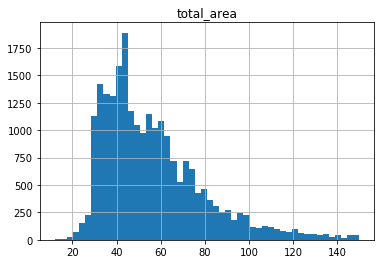

In [28]:
# гистограмма - общая площадь квартиры
data.hist('total_area', bins=50, range=(12, 150))
print('Минимальная общая площадь квартиры', data['total_area'].min(), 'кв.метров')
print('Максимальная общая площадь квартиры', data['total_area'].max(), 'кв.метров')
print('Медианная общая площадь квартиры', data['total_area'].median(), 'кв.метров')


Показатели минимальной, максимальной и медианной площади квартир адекватны, значений нулевой или почти нулевой площади квартиры или, наоборот, квартир с площадью футбольных полей нет. 

Медианная площадь квартиры - 52 квадратных метра. Однако, гистограмма показывает самую популярную площадь квартиры около 42-45 квадратных метров. 

Распределение площадей квартир также соответствует реальности: основная доля составляет квартиры с площадями 28 - 100 квадратных метров, существует некоторое количество квартир с большей площадью.


На этом этапе принимается условие учебного проекта - квартиры с необычно большой площадью не рассматриваются, и далее из таблицы удаляются.


Минимальная жилая площадь квартиры 2.0 кв.метров
Максимальная жилая площадь квартиры 409.7 кв.метров
Медианная жилая площадь квартиры 30.0 кв.метров

Количество квартир типа апартаменты 50
Количество квартир-студий 149


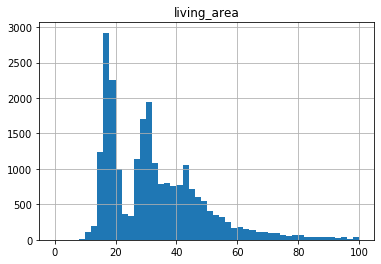

In [29]:
# гистограмма -  жилая площадь квартиры
data.hist('living_area', bins=50, range=(0, 100))
print('Минимальная жилая площадь квартиры', data['living_area'].min(), 'кв.метров')
print('Максимальная жилая площадь квартиры', data['living_area'].max(), 'кв.метров')
print('Медианная жилая площадь квартиры', data['living_area'].median(), 'кв.метров')
# данные, помогающие понять самые низкие величины площади на гистограмме
print()
print('Количество квартир типа апартаменты', len(data.loc[data['is_apartment'] == True]))
print('Количество квартир-студий', len(data.loc[data['studio'] == True]))

Показатели минимальной, максимальной и медианной жилой площади квартир адекватны. Также нет неадекватных значений. Наличие в таблице небольшого количества квартир-студий и апартаментов объясняет самые низкие значения жилой площади. 

Гистограмма имеет три явно выраженных пика (на гистограмме с общей площадью квартир пики существуют, но гораздо менее выражены). По всей видимости, пики соответствуют 1-комнатным, 2-комнатным и 3-комнтаным квартирам. Т.к., жилая площадь квартиры - это площадь комнат квартиры, то логичным выглядит скачкообразный характер гистограммы. Количество комнат в кварире - параметр дискретный, не имеет промежуточных значений. Вслед за количеством квартир также близко к дискретному меняется жилая площадь квартир. Хвост гистограммы вправо означает наличие квартир с большим количеством комнат (большим трёх), но т.к., количество их значительно меньше, пики на гистограмме не проявляются.


Минимальная площадь кухни 1.3 кв.метров
Максимальная площадь кухни 112.0 кв.метров
Медианная площадь кухни 9.04 кв.метров


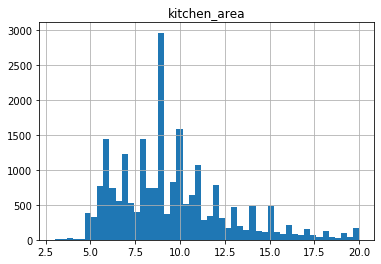

In [30]:
# гистограмма - площадь кухни
data.hist('kitchen_area', bins=50, range=(3, 20))
print('Минимальная площадь кухни', data['kitchen_area'].min(), 'кв.метров')
print('Максимальная площадь кухни', data['kitchen_area'].max(), 'кв.метров')
print('Медианная площадь кухни', data['kitchen_area'].median(), 'кв.метров')

Показатели минимальной и медианной площади кухонь адекватны. Максимальная площадь кухни близко к неадекватному значению. Наличие в таблице небольшого количества квартир-студий и апартаментов объясняет самые низкие значения площади кухонь.

Гистограмма имеет ряд явно выраженных пиков, один из которых по величине минимум в два раза превосходит другие, и примерно соответствует медианной площади кухни - 9.04 кв.метров. Такой характер гистограммы легко объяснить станадатрностью планировок, универсальностью СНИПов, небольшой зависимостью площади кухни от других параметров квартиры. Таким образом, самая часто встречающаяся площадь кухни - 9 кв.метров, другие площади кухонь имеют близко к дискретному набор площадей. 

Хвост гистограммы вправо всё также следует за квартирами больших площадей. Пики на гистограмме более выражены посравнению с общими и жилыми площадями, что также может объясняться универсальностью СНИПов.

Минимальное количество комнат в квартире 0
Максимальное количество комнат в квартире 19
Медианное значение количества комнат в квартире 2.0


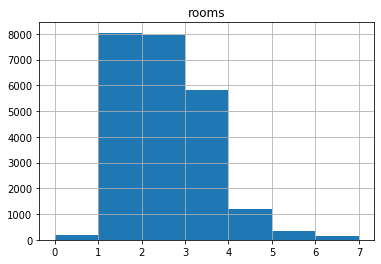

In [31]:
# гистограмма - количество комнат в квартире
data.hist('rooms', bins=7, range=(0, 7))
print('Минимальное количество комнат в квартире', data['rooms'].min())
print('Максимальное количество комнат в квартире', data['rooms'].max())
print('Медианное значение количества комнат в квартире', data['rooms'].median())

In [32]:
# данные, помогающие понять самые низкие величины площади на гистограмме
display(data.loc[data['rooms'] == 0])
print('Количество квартир с нулём комнат, т.е. без комнат', len(data.loc[data['rooms'] == 0]))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
144,1,2.4,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,...,0,0.5,0,0.5,181.0,3,0.088889,0.574074,0.235185,другой
349,4,2.3,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,...,0,0.5,0,0.5,45.0,2,0.092000,0.680000,0.361600,первый
440,8,2.5,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,...,0,0.5,2,1.0,64.0,0,0.092217,0.912947,NaN,другой
508,0,3.4,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,...,0,0.5,1,0.6,430.0,1,0.098837,0.706395,0.261628,другой
608,2,1.8,25.00,2019-02-20,0,2.65,10.0,17.00,7,False,...,0,0.5,0,0.6,29.0,2,0.072000,0.680000,0.361600,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.2,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,...,0,0.5,1,0.6,14.0,4,0.123077,0.692308,0.347692,другой
23442,0,2.5,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,...,0,0.5,0,0.5,4.0,3,0.090253,0.649819,0.326354,другой
23554,15,3.4,26.00,2018-09-07,0,2.65,19.0,17.38,8,False,...,0,0.5,2,0.1,31.0,4,0.130769,0.668462,0.347692,другой
23592,10,1.4,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,...,0,0.5,0,0.5,82.0,5,0.048276,0.620690,0.227586,другой


Количество квартир с нулём комнат, т.е. без комнат 197


В таблице 197 квартир без единой комнаты, но с ненулевой площадью что, видимо, является ошибкой записи или испорченными данными. 

Максимальное количество комнат в квартире 19 - значение необычное.

Медианное значение количества комнат в квартире 2.0 - это адекватное значение.


Минимальный срок продажи в днях 0.0
Максимальный срок продажи в днях 1618.0
Медианный срок продажи в днях 94.0
Средний срок продажи в днях 185.8217224355458


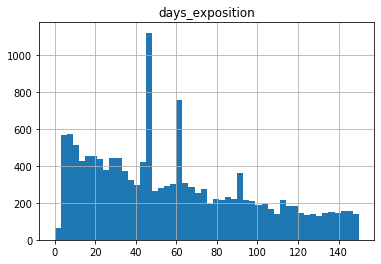

In [33]:
# гистограмма - время продажи квартиры
data.hist('days_exposition', bins=50, range=(0, 150))

print('Минимальный срок продажи в днях', data['days_exposition'].min())
print('Максимальный срок продажи в днях', data['days_exposition'].max())
print('Медианный срок продажи в днях', data['days_exposition'].median())
print('Средний срок продажи в днях', data['days_exposition'].mean())

Минимальный срок продажи 0 дней.

Максимальный срок продажи 1618 дней (4 с половиной года).

Медианный срок продажи 94 дня.

Средний срок продажи 185 дней (полгода).


Все вышеприведённые значения не противоречат здравому смыслу - продажа в день подачи объявления возможна, но такое происходит редко; объявления о продаже картир также могут висеть годами - тоже бывает; медианный срок - 3 месяца - нормальное значение; средний срок продажи 185 дней - значение больше медианного в два раза, означает то, что достаточно большое число квартир продавалось сильно дольше медианного. 

Необычно выглядит распределение сроков продажи. Медианное и среднее значения не выделяются на гистограмме пиками (пик на медианной), но вокруг медианного нет "склонов горы", скорее это совпадение медианного с типичным сроком договора, например.

Помимо этих значений, гистограмма показывает самые популярные сроки продажи квартир, резко выделяющиеся по своей популярности - 45, 60, 90 дней. Можно предположить, что это типичные сроки договоров с агентствами.


Рассмотрим крайние значения подробнее.

In [34]:
# самые быстрые и самые медленные продажи

display(data.loc[data['days_exposition'] == 0].head(10))
print('Количество квартир, проданных в день подачи объявления:', 
len(data.loc[data['days_exposition'] == 0]))

display(data.loc[data['days_exposition'] > 365].head(10))
print('Количество квартир, продававшихся более 1 года:', 
len(data.loc[data['days_exposition'] > 365]))

display(data.loc[data['days_exposition'] > 730].head())
print('Количество квартир, продававшихся более 2 лет:', 
len(data.loc[data['days_exposition'] > 730]))

display(data.loc[data['days_exposition'] > 1460].head())
print('Количество квартир, продававшихся более 4 лет:', 
len(data.loc[data['days_exposition'] > 1460]))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
2178,10,5.1,51.00,2019-05-03,1,2.65,9.0,15.00,2,False,...,0,0.5,0,0.5,0.0,4,0.100000,0.294118,0.490196,другой
3254,16,8.8,80.00,2019-05-03,3,2.80,17.0,31.00,15,False,...,0,0.5,0,0.5,0.0,4,0.110000,0.387500,0.337500,другой
4450,13,3.5,34.60,2019-05-03,1,2.50,5.0,19.40,3,False,...,1,0.4,0,0.5,0.0,4,0.101156,0.560694,0.210983,другой
5986,0,5.0,48.00,2019-05-03,3,2.50,9.0,27.00,2,False,...,0,0.5,0,0.5,0.0,4,0.104167,0.562500,0.197917,другой
8170,4,3.3,38.19,2019-05-03,1,2.65,6.0,14.41,4,False,...,0,0.5,0,0.5,0.0,4,0.086410,0.377324,0.268657,другой
9217,7,4.3,35.70,2019-05-03,1,2.70,21.0,15.00,12,False,...,0,0.5,0,0.5,0.0,4,0.120448,0.420168,0.364146,другой
10917,20,10.0,62.30,2019-05-03,2,2.65,6.0,20.00,3,False,...,2,0.6,0,0.5,0.0,4,0.160514,0.321027,0.481541,другой
12003,10,1.0,37.10,2019-05-03,1,2.65,4.0,17.00,4,False,...,0,0.5,0,0.5,0.0,4,0.026954,0.458221,0.226415,последний
12208,7,9.0,60.30,2019-05-03,2,3.25,5.0,36.90,4,False,...,1,0.4,0,0.5,0.0,4,0.149254,0.611940,0.096186,другой
12343,12,2.9,48.80,2019-05-03,2,2.55,5.0,29.40,1,False,...,0,0.5,0,0.5,0.0,4,0.059426,0.602459,0.147541,первый


Количество квартир, проданных в день подачи объявления: 20


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
2,10,5.2,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,0.1,2,0.6,558.0,3,0.092857,0.612500,0.148214,другой
3,0,64.9,159.0,2015-07-24,3,2.65,14.0,95.0,9,False,...,2,0.1,3,0.2,424.0,4,0.408176,0.597484,0.059748,другой
13,20,3.6,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,1,0.3,3,0.3,366.0,5,0.084112,0.630841,0.121495,последний
16,11,6.7,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,3,0.4,0,0.5,397.0,3,0.081707,0.678049,0.109756,первый
17,6,4.2,36.0,2016-09-09,1,2.65,17.0,16.5,7,False,...,0,0.5,1,0.9,571.0,4,0.116667,0.458333,0.305556,другой
23,11,3.0,32.0,2016-10-29,1,2.60,9.0,17.7,9,False,...,2,0.5,1,0.2,615.0,5,0.093750,0.553125,0.190625,последний
35,6,15.5,149.0,2017-06-26,5,2.65,5.0,104.0,4,False,...,0,0.5,1,0.8,644.0,0,0.104027,0.697987,0.114094,другой
40,9,3.6,36.0,2017-03-15,1,2.60,26.0,15.0,22,False,...,0,0.5,0,0.6,430.0,2,0.100000,0.416667,0.277778,другой
42,13,22.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,...,2,0.0,1,0.9,987.0,2,0.135970,0.500000,0.108776,другой
43,13,9.3,48.0,2017-01-10,2,3.00,4.0,28.0,4,False,...,0,0.5,1,0.5,763.0,1,0.193750,0.583333,0.156250,последний


Количество квартир, продававшихся более 1 года: 3691


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
42,13,22.0,161.8,2015-07-08,4,2.80,4.0,80.9,2,False,...,2,0.0,1,0.9,987.0,2,0.135970,0.500000,0.108776,другой
43,13,9.3,48.0,2017-01-10,2,3.00,4.0,28.0,4,False,...,0,0.5,1,0.5,763.0,1,0.193750,0.583333,0.156250,последний
98,11,11.7,80.0,2014-12-10,3,2.65,5.0,55.1,3,False,...,1,0.7,0,0.5,831.0,2,0.146250,0.688750,0.137500,другой
109,2,7.5,62.5,2015-12-08,2,2.65,5.0,35.5,5,False,...,1,0.5,0,0.5,1048.0,1,0.120000,0.568000,0.152000,последний
145,6,8.3,77.0,2015-09-21,2,2.77,16.0,40.0,5,False,...,0,0.5,1,0.3,807.0,0,0.107792,0.519481,0.129870,другой


Количество квартир, продававшихся более 2 лет: 959


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
260,8,17.2,102.40,2014-12-09,3,2.65,8.0,53.20,3,False,...,1,0.5,0,0.5,1606.0,1,0.167969,0.519531,0.188477,другой
957,20,23.0,138.00,2015-02-19,4,3.50,5.0,79.50,2,False,...,1,0.8,0,0.5,1534.0,3,0.166667,0.576087,0.080435,другой
1109,1,34.9,95.80,2014-12-09,2,2.65,6.0,58.30,5,True,...,2,0.2,3,0.6,1572.0,1,0.364301,0.608559,0.208768,другой
1885,2,13.3,79.60,2014-12-09,2,3.00,8.0,42.70,7,False,...,1,0.5,0,0.5,1513.0,1,0.167085,0.536432,0.226131,другой
2814,4,14.5,101.57,2014-12-11,3,3.00,17.0,53.35,3,False,...,2,0.2,3,0.2,1604.0,3,0.142759,0.525254,0.229398,другой


Количество квартир, продававшихся более 4 лет: 53


В день подачи объявления было продано 20 квартир. Разброс параметров квартир достаточно широкий, но все квартиры были проданы в один и тот же день. Это маловероятно, но не невозможно. Например, это может быть покупка квартир некой организацией под склады, офисы, корпоративные гостиницы, штаб-квартиры и прочее. 

Число квартир, продававшихся длительное время - 1 год, 2 года и т.д. плавно снижается с увеличением срока сделки. Более 4 лет продавалось 53 квартиры, цена которых заметно выше медианной.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f153d7aa490>]],
      dtype=object)

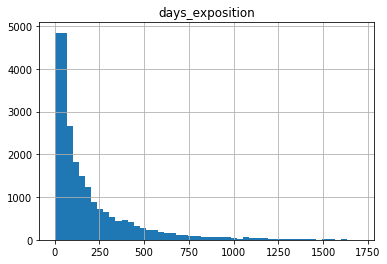

In [35]:
# гистограмма для всех значений столбца days_exposition
data.hist('days_exposition', bins=50, range=(0, 1700))

Верхняя граница значений в днях, выше которой значения нужно удалять: 528.0


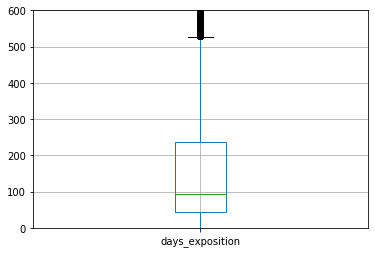

In [36]:
# диаграмма для значений столбца days_exposition
import matplotlib.pyplot as plt

data.boxplot('days_exposition') 
plt.ylim(0, 600)

# рассчёт верхней границы выбросов значений столбца days_exposition
q1 = data['days_exposition'].quantile(0.25)
q3 = data['days_exposition'].quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница значений в днях, выше которой значения нужно удалять:', (q3 + 1.5 * iqr))

Можно считать, что: 

Продажи прошли необычно быстро - несколько дней.

Продажи прошли необычно долго - более 528 дней, т.е. выше горизонтальной линии на диаграмме, обозначающей начало значений-выбросов. 


УДАЛЕНИЕ РЕДКИХ И ВЫБИВАЮЩИХСЯ ЗНАЧЕНИЙ 

In [37]:
# рассчёт верхней границы выбросов значений столбца last_price
q1 = data['last_price'].quantile(0.25)
q3 = data['last_price'].quantile(0.75)
iqr = q3 - q1  
print('Нижняя граница значений в миллионах рублей, ниже которой значения нужно удалять:', 
      (q1 - 1.5 * iqr))  
print('Верхняя граница значений в миллионах рублей, выше которой значения нужно удалять:', 
      (q3 + 1.5 * iqr))

Нижняя граница значений в миллионах рублей, ниже которой значения нужно удалять: -1.6999999999999997
Верхняя граница значений в миллионах рублей, выше которой значения нужно удалять: 11.899999999999999


last_price / сумма сделки

Методом quantile() удалось определить верхнюю границу выбросов - 11,9 млн. рублей. Найденная нижняя граница не имеет смысла, поэтому буду пользоваться значением, которое нашёл ранее - 400 тысяч рублей, или 0,4 млн. рублей.

In [38]:
# рассчёт верхней границы выбросов значений столбца total_area
q1 = data['total_area'].quantile(0.25)
q3 = data['total_area'].quantile(0.75)
iqr = q3 - q1  
print('Нижняя граница значений в кв.метрах, ниже которой значения нужно удалять:', 
      (q1 - 1.5 * iqr)) 
print('Верхняя граница значений в кв.метрах, выше которой значения нужно удалять:', 
      (q3 + 1.5 * iqr))

Нижняя граница значений в кв.метрах, ниже которой значения нужно удалять: -4.8500000000000085
Верхняя граница значений в кв.метрах, выше которой значения нужно удалять: 114.75000000000001


total_area / общая площадь квартиры

За нижнюю границу принимаю найденное ранее значение - минимальная общая площадь квартиры 12.0 кв.метров.
Верхняя граница значений в кв.метрах, выше которой значения нужно удалять: 114.75.

In [39]:
# рассчёт верхней границы выбросов значений столбца living_area
q1 = data['living_area'].quantile(0.25)
q3 = data['living_area'].quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница значений в кв.метрах, выше которой значения нужно удалять:', 
      (q3 + 1.5 * iqr))

Верхняя граница значений в кв.метрах, выше которой значения нужно удалять: 77.85


living_area / жилая площадь квартиры

За нижнюю границу принимаю найденное ранее значение - минимальная жилая площадь квартиры 2.0 кв.метров.
Верхняя граница значений в кв.метрах, выше которой значения нужно удалять: 77.85.

In [40]:
# рассчёт верхней границы выбросов значений столбца kitchen area
q1 = data['kitchen_area'].quantile(0.25)
q3 = data['kitchen_area'].quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница значений в кв.метрах, выше которой значения нужно удалять:', 
      (q3 + 1.5 * iqr))

Верхняя граница значений в кв.метрах, выше которой значения нужно удалять: 17.8


kitchen area / площадь кухни

За нижнюю границу принимаю найденное ранее значение - минимальная площадь кухни 1.3 кв.метров.
Верхняя граница значений в кв.метрах, выше которой значения нужно удалять: 17.8.



In [41]:
# рассчёт верхней границы выбросов значений столбца rooms
q1 = data['rooms'].quantile(0.25)
q3 = data['rooms'].quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница количества комнат, больше которого значения нужно удалять:', (q3 + 1.5 * iqr))


Верхняя граница количества комнат, больше которого значения нужно удалять: 6.0


rooms / количество комнат

Исходя из здравого смысла, удаляю квартиры с нулём комнат - нижняя граница выбросов. 
Верхняя граница количества комнат  - 6 комнат.

In [42]:
# рассчёт верхней границы выбросов значений столбца ceiling_height
q1 = data['ceiling_height'].quantile(0.25)
q3 = data['ceiling_height'].quantile(0.75)
iqr = q3 - q1  
print('Нижняя граница значений в метрах, ниже которой значения нужно удалять:', 
      (q1 - 1.5 * iqr))
print('Верхняя граница значений в метрах, выше которой значения нужно удалять:', 
      (q3 + 1.5 * iqr))

Нижняя граница значений в метрах, ниже которой значения нужно удалять: 2.45
Верхняя граница значений в метрах, выше которой значения нужно удалять: 2.8500000000000005


ceiling_height / высота потолка

Нижняя граница - потолок высотой 2.45 метра.
Верхняя граница значений - 2.85 метра.


In [43]:
# непосредственно удаление выбросов и формирование новой таблицы, добытой с горькими слезами
bitter_data = data.query('days_exposition <= 528 and 0.4 <= last_price <=11.9 \
and 12 <= total_area <= 114.75 and 2 <= living_area <= 77.85 and 1.3 <= kitchen_area <= 17.8 \
and 1 <= rooms < 7 and 2.45 <= ceiling_height <= 2.85') 
         
display(bitter_data.head(10))      
bitter_data.info()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort
1,7,3.4,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0,0.5,0,0.6,81.0,1,0.084158,0.460396,0.272277,первый
5,10,2.9,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,0.5,0,0.5,55.0,0,0.095395,0.473684,0.299342,другой
6,6,3.7,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0,0.5,0,0.6,155.0,3,0.099196,0.284182,0.386059,другой
8,20,2.9,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,0.5,0,0.5,189.0,2,0.087455,0.465320,0.265682,другой
9,18,5.4,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,0.5,0,0.5,289.0,6,0.088525,0.714754,0.106557,другой
10,5,5.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,1,0.3,2,0.6,137.0,3,0.126263,0.512626,0.214646,другой
11,9,3.3,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,...,0,0.4,0,0.6,7.0,0,0.075000,0.704545,0.136364,другой
12,10,3.9,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,...,0,0.5,0,0.5,90.0,3,0.072222,0.555556,0.166667,последний
13,20,3.6,42.80,2017-07-01,2,2.56,5.0,27.00,5,False,...,1,0.3,3,0.3,366.0,5,0.084112,0.630841,0.121495,последний
14,1,4.4,36.00,2016-06-23,1,2.65,6.0,17.00,1,False,...,0,0.4,1,0.1,203.0,3,0.122222,0.472222,0.222222,первый


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17581 entries, 1 to 23696
Data columns (total 27 columns):
total_images            17581 non-null int64
last_price              17581 non-null float64
total_area              17581 non-null float64
first_day_exposition    17581 non-null datetime64[ns]
rooms                   17581 non-null int64
ceiling_height          17581 non-null float64
floors_total            17517 non-null float64
living_area             17581 non-null float64
floor                   17581 non-null int64
is_apartment            17581 non-null bool
studio                  17581 non-null bool
open_plan               17581 non-null bool
kitchen_area            17581 non-null float64
balcony                 17581 non-null int64
locality_name           17549 non-null object
airports_nearest        17581 non-null int64
city_centers_nearest    17581 non-null float64
parks_around3000        17581 non-null int64
parks_nearest           17581 non-null float64
ponds_around3

Минимальная цена квартиры 0.4 миллионов рублей
Максимальная цена квартиры 11.9 миллионов рублей
Медианная цена квартиры 4.2 миллионов рублей


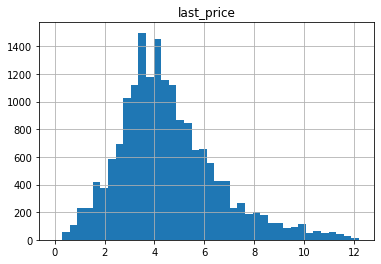

In [44]:
# гистограмма - цена квартиры после удаления значений-выбросов
bitter_data.hist('last_price', bins=40, range=(0, 12.2))
print('Минимальная цена квартиры', bitter_data['last_price'].min(), 'миллионов рублей')
print('Максимальная цена квартиры', bitter_data['last_price'].max(), 'миллионов рублей')
print('Медианная цена квартиры', bitter_data['last_price'].median(), 'миллионов рублей')

Минимальная общая площадь квартиры 12.0 кв.метров
Максимальная общая площадь квартиры 114.3 кв.метров
Медианная общая площадь квартиры 47.0 кв.метров


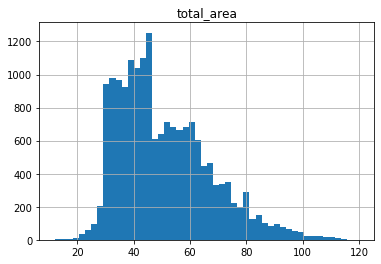

In [45]:
# гистограмма - общая площадь квартиры после удаления значений-выбросов

bitter_data.hist('total_area', bins=50, range=(12, 120))
print('Минимальная общая площадь квартиры', bitter_data['total_area'].min(), 'кв.метров')
print('Максимальная общая площадь квартиры', bitter_data['total_area'].max(), 'кв.метров')
print('Медианная общая площадь квартиры', bitter_data['total_area'].median(), 'кв.метров')


Минимальная жилая площадь квартиры 3.0 кв.метров
Максимальная жилая площадь квартиры 77.0 кв.метров
Медианная жилая площадь квартиры 28.4 кв.метров


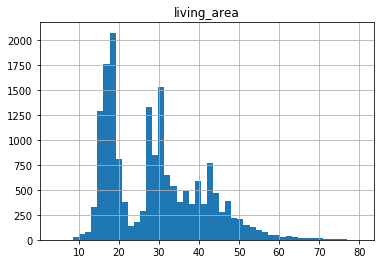

In [46]:
# гистограмма -  жилая площадь квартиры после удаления значений-выбросов
bitter_data.hist('living_area', bins=50, range=(4, 80))
print('Минимальная жилая площадь квартиры', bitter_data['living_area'].min(), 'кв.метров')
print('Максимальная жилая площадь квартиры', bitter_data['living_area'].max(), 'кв.метров')
print('Медианная жилая площадь квартиры', bitter_data['living_area'].median(), 'кв.метров')

Минимальная площадь кухни 1.3 кв.метров
Максимальная площадь кухни 17.8 кв.метров
Медианная площадь кухни 8.9 кв.метров


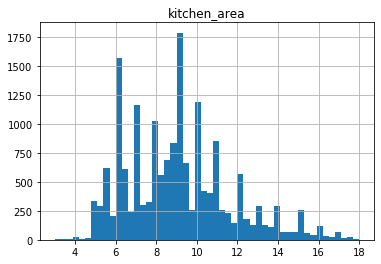

In [47]:
# гистограмма - площадь кухни после удаления значений-выбросов
bitter_data.hist('kitchen_area', bins=50, range=(3, 18))
print('Минимальная площадь кухни', bitter_data['kitchen_area'].min(), 'кв.метров')
print('Максимальная площадь кухни', bitter_data['kitchen_area'].max(), 'кв.метров')
print('Медианная площадь кухни', bitter_data['kitchen_area'].median(), 'кв.метров')

Минимальное количество комнат в квартире 1
Максимальное количество комнат в квартире 6
Медианное значение количества комнат в квартире 2.0


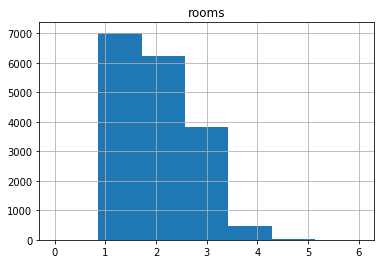

In [48]:
# гистограмма - количество комнат в квартире после удаления значений-выбросов
bitter_data.hist('rooms', bins=7, range=(0, 6))
print('Минимальное количество комнат в квартире', bitter_data['rooms'].min())
print('Максимальное количество комнат в квартире', bitter_data['rooms'].max())
print('Медианное значение количества комнат в квартире', bitter_data['rooms'].median())

 Построенные вновь гистограммы после удаления значений-выбросов имеют более логичный вид.

In [49]:
# изучение зависимости цены на квартиру от её площади

print('Коэффициент корреляция цены квартиры от её общей площади', 
      bitter_data['last_price'].corr(bitter_data['total_area']))

print('Коэффициент корреляция цены квартиры от её жилой площади', 
      bitter_data['last_price'].corr(bitter_data['living_area']))

print('Коэффициент корреляция цены квартиры от её площади кухни', 
      bitter_data['last_price'].corr(bitter_data['kitchen_area']))


Коэффициент корреляция цены квартиры от её общей площади 0.6699628569803002
Коэффициент корреляция цены квартиры от её жилой площади 0.5464572047602636
Коэффициент корреляция цены квартиры от её площади кухни 0.4512150014917904


Данные показывают, что на цену квартиры сильно влияет её общая площадь (коэффициент корреляции 0,67). 

Чуть менее влияет на цену квартиры площадь кухни (коэффициент корреляции 0,55).

Значительно, но менее других указанных параметров на цену квартиры влияет жилая площадь квартиры (коэффициент корреляции 0,45).

In [50]:
# изучение зависимости цены на квартиру от числа комнат, удалённости от центра 

print('Коэффициент корреляция цены квартиры от числа комнат в ней', 
      bitter_data['last_price'].corr(bitter_data['rooms']))

print('Коэффициент корреляция цены квартиры от её удалённости от центра города', 
      bitter_data['last_price'].corr(bitter_data['city_centers_nearest']))

Коэффициент корреляция цены квартиры от числа комнат в ней 0.41015211415824226
Коэффициент корреляция цены квартиры от её удалённости от центра города -0.19292228238649944


Количество комнат в квартире сильно влияет на её цену (коэффициент корреляции 0,41).

Удалённость квартиры от центра города на цену квартиры влияет слабо, и обратно пропорционально, т.е.: чем дальше от центра, тем дешевле квартира, (коэффициент корреляции минус 0,19).

In [51]:
# изучение зависимости цены на квартиру от того, на каком этаже расположена квартира: первом, 
# последнем или другом

print('Коэффициент корреляция цены квартиры от её расположения на первом этаже', 
      bitter_data['last_price'].corr(bitter_data['floor_sort'] == 'первый'))

print('Коэффициент корреляция цены квартиры от её расположения на последнем этаже', 
      bitter_data['last_price'].corr(bitter_data['floor_sort'] == 'последний'))

print('Коэффициент корреляция цены квартиры от её расположения между перым и последним этажом', 
      bitter_data['last_price'].corr(bitter_data['floor_sort'] == 'другой'))

Коэффициент корреляция цены квартиры от её расположения на первом этаже -0.14385640927474574
Коэффициент корреляция цены квартиры от её расположения на последнем этаже -0.09930388990413094
Коэффициент корреляция цены квартиры от её расположения между перым и последним этажом 0.18559319206060845


Зависимость цены на квартиру от того, на каком этаже она расположена не сильно выражена. 

Из трёх категорий этажности квартиры, наибольшую степень зависимости от этажа имеет цена квартиры между первым и последним (другим) этажом. Зависимость прямо пропорциональная, т.е., чем выше этаж, тем немного дороже квартира, (коэффициент корреляции 0,24).


In [52]:
# изучение зависимости цены на квартиру от даты размещения: дня недели, месяца и года.

print('Коэффициент корреляция цены квартиры от дня размещения объявления о её продаже', 
      bitter_data['last_price'].corr(bitter_data['weekday_exposition']))

Коэффициент корреляция цены квартиры от дня размещения объявления о её продаже -0.0054175538407567605


Зависимости цены на квартиру от дня недели размещения объявления о её продаже нет (коэффициент корреляции близок к нулю и составляет минус 0,005).

In [53]:
# добавление столбцов с месяцем и годом подачи объявления о продаже квартиры
bitter_data['month'] = pd.DatetimeIndex(bitter_data['first_day_exposition']).month 
bitter_data['year'] = pd.DatetimeIndex(bitter_data['first_day_exposition']).year

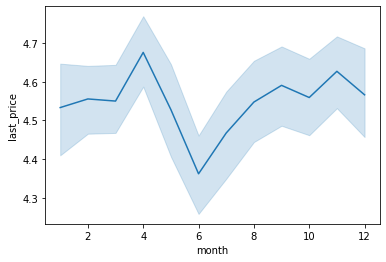

In [54]:
import seaborn as sns
sns.lineplot(data = bitter_data, x = 'month', y = 'last_price')
plt.show()

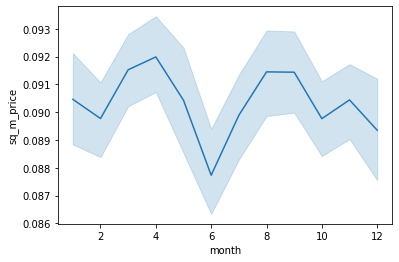

In [55]:
sns.lineplot(data = bitter_data, x = 'month', y = 'sq_m_price')
plt.show()

Зависимость цены на квартиру от месяца размещения объявления о её продаже имеет волнообразный характер с двумя подъёмами - весной и осенью, и соответственно двумя провалами - летом и зимой. Провал, приходящийся на летние месяцы, а именно на июнь, более выражен.

Графики, построенные для цен на квартиры и для цены квадратного метра очень близки по своей форме, отличия малозначительны. 



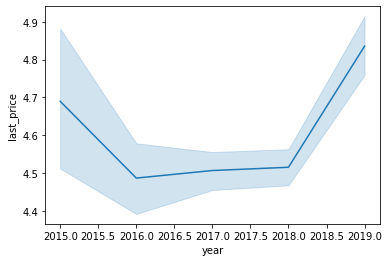

In [56]:
sns.lineplot(data = bitter_data, x = 'year', y = 'last_price')
plt.show()

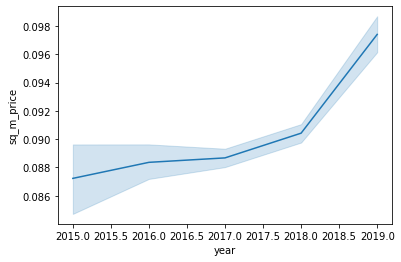

In [57]:
sns.lineplot(data = bitter_data, x = 'year', y = 'sq_m_price')
plt.show()

Зависимость цены на квартиру от года размещения объявления о её продаже.

График, построенный для цен на квариры имеет три большие стадии: падение с 2015 по 2016 годы со скоростью 200 тысяч в год; близкий к равномерному медленный рост с 2016 по 2018 годы со скоростью примерно 35 тысяч в год; и довольно быстрый рост с 2018 по 2019 год с скоростью 300 тысяч в год.

График, построенный для цены квадратного метра имеет отличный характер на участке с 2015 по 2016 годы, по сравнению с графиком выше. На этом графике цена квадратного метра на участке с 2015 по 2016 годы медленно растёт.

Учитывая то, что первый график относится по сути к средней цене квартиры, можно предположить, что с 2015 по 2016 годы в объявлениях о продаже квартир была тенденция на продажу всё более дешёвых квартир, вероятно, ниже статусом, меньшей площади и т.п. Быстрый рост цены на квадратный метр с 2018 года потянул с собой такой же быстрый рост цен на квартиры в целом.



Выше, при просмотре названий населённых пунктов, присутствующих в таблице, для контроля наличия дублей я выводил первые 30 названий. Здесь приведены первые 10 названий населённых пунктов в порядке убывания числа поданных объявлений с квартирами в этих населённых пунктах.

Санкт-Петербург            15721

посёлок Мурино               522

посёлок Шушары               440

Всеволожск                   398

Пушкин                       369

Колпино                      338

посёлок Парголово            327

Гатчина                      307

деревня Кудрово              299

Выборг                       237


Рассмотрим каждый приведённый здесь населённый пункт подробнее.

In [58]:
# средние цены квадратного метра жилья для первой десятки самых популярных населённых пунктов

# Санкт-Петербург
print('Средняя цена квадратного метра жилья в Санкт-Петербурге:',
      bitter_data.loc[bitter_data['locality_name'] == 'Санкт-Петербург', 'sq_m_price'].mean())
print()
# посёлок Мурино
print('Средняя цена квадратного метра жилья в посёлке Мурино:',
      bitter_data.loc[bitter_data['locality_name'] == 'посёлок Мурино', 'sq_m_price'].mean())
print()
# посёлок Шушары
print('Средняя цена квадратного метра жилья в посёлке Шушары:',
      bitter_data.loc[bitter_data['locality_name'] == 'посёлок Шушары', 'sq_m_price'].mean())
print()
# Всеволожск
print('Средняя цена квадратного метра жилья в Всеволожске:',
      bitter_data.loc[bitter_data['locality_name'] == 'Всеволожск', 'sq_m_price'].mean())
print()
# Пушкин
print('Средняя цена квадратного метра жилья в Пушкине:',
      bitter_data.loc[bitter_data['locality_name'] == 'Пушкин', 'sq_m_price'].mean())
print()
# Колпино
print('Средняя цена квадратного метра жилья в Колпино:',
      bitter_data.loc[bitter_data['locality_name'] == 'Колпино', 'sq_m_price'].mean())
print()
# посёлок Парголово
print('Средняя цена квадратного метра жилья в посёлке Парголово:',
      bitter_data.loc[bitter_data['locality_name'] == 'посёлок Парголово', 'sq_m_price'].mean())
print()
# Гатчина
print('Средняя цена квадратного метра жилья в Гатчине:',
      bitter_data.loc[bitter_data['locality_name'] == 'Гатчина', 'sq_m_price'].mean())
print()
# деревня Кудрово
print('Средняя цена квадратного метра жилья в деревне Кудрово:',
      bitter_data.loc[bitter_data['locality_name'] == 'деревня Кудрово', 'sq_m_price'].mean())
print()
# Выборг 
print('Средняя цена квадратного метра жилья в Выборге:', 
      bitter_data.loc[bitter_data['locality_name'] == 'Выборг', 'sq_m_price'].mean())

Средняя цена квадратного метра жилья в Санкт-Петербурге: 0.10430877352028717

Средняя цена квадратного метра жилья в посёлке Мурино: 0.08542294511200253

Средняя цена квадратного метра жилья в посёлке Шушары: 0.0782837777792902

Средняя цена квадратного метра жилья в Всеволожске: 0.0665629417244675

Средняя цена квадратного метра жилья в Пушкине: 0.09917925732730397

Средняя цена квадратного метра жилья в Колпино: 0.07532119998258203

Средняя цена квадратного метра жилья в посёлке Парголово: 0.0906573441964324

Средняя цена квадратного метра жилья в Гатчине: 0.06844485991729009

Средняя цена квадратного метра жилья в деревне Кудрово: 0.09307534367341543

Средняя цена квадратного метра жилья в Выборге: 0.05735858467369964


Средние цены квадратного метра жилья для первой десятки самых популярных населённых пунктов в порядке убывания:

Санкт-Петербург - 104 тыс.рублей

Пушкин - 99 тыс.рублей

деревня Кудрово - 93 тыс.рублей

посёлок Парголово - 90 тыс.рублей

посёлок Мурино - 85 тыс.рублей 

посёлок Шушары - 78 тыс.рублей

Колпино - 75 тыс.рублей

Гатчина - 68 тыс.рублей

Всеволожск - 66 тыс.рублей

Выборг - 57 тыс.рублей

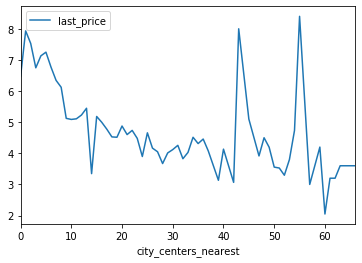

In [59]:
# график зависимости цены квартиры от удалённости от центра СПб
again_data = bitter_data.pivot_table(index= 'city_centers_nearest', values='last_price')
again_data.plot() 

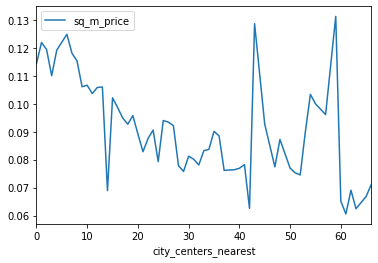

In [60]:
# график зависимости цены квадратного метра квартиры от удалённости от центра СПб
another_data = bitter_data.pivot_table(index= 'city_centers_nearest', values='sq_m_price')
another_data.plot() 

Для исключения искажения построил два графика зависимости цены на жильё в зависимости от удалённости от цетра Санкт-Петербурга. Графики имеют схожий вид. 

Далее рассмотрим подробнее область расстояний до 15 км, и подробнее изучим два очень высоких пика на значительном удалении от центра Санкт-Петербурга, т.е. необычно дорогие кваритиры, находящиеся явно не в городе Санкт-Петербург.

In [61]:
# ищу строчки с объявлениями о продаже необычно дорогих и удалённых квартир

# первый пик
display(bitter_data.loc[(42 < data['city_centers_nearest']) & 
                        (data['city_centers_nearest'] < 45)])

# вторй пик
display(bitter_data.loc[(52 < data['city_centers_nearest']) & 
                        (data['city_centers_nearest'] < 60) & 
                        (5 < data['last_price'])])


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort,month,year
19984,20,8.0,62.2,2018-07-29,2,2.65,6.0,32.79,6,False,...,3,0.2,23.0,6,0.128617,0.52717,0.189389,последний,7,2018


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort,month,year
376,18,8.4,84.0,2018-06-26,2,2.75,3.0,41.0,1,False,...,0,0.5,201.0,1,0.100000,0.488095,0.154762,первый,6,2018
1687,0,6.0,87.0,2017-06-28,2,2.80,4.0,37.0,3,False,...,3,0.4,236.0,2,0.068966,0.425287,0.172414,другой,6,2017
2036,19,6.1,50.0,2018-03-24,2,2.60,5.0,29.0,5,False,...,1,0.9,72.0,5,0.122000,0.580000,0.180000,последний,3,2018
3477,4,6.4,67.2,2016-10-10,3,2.65,6.0,43.0,1,False,...,1,0.4,316.0,0,0.095238,0.639881,0.178571,первый,10,2016
4906,11,5.5,49.0,2017-10-24,2,2.50,5.0,29.0,3,False,...,2,0.5,25.0,1,0.112245,0.591837,0.173469,другой,10,2017
9493,0,5.4,47.5,2017-06-14,2,2.55,5.0,29.9,4,False,...,1,0.9,394.0,2,0.113684,0.629474,0.168421,другой,6,2017
18096,2,6.2,70.2,2015-11-10,3,2.65,4.0,43.7,4,False,...,1,0.5,259.0,1,0.088319,0.622507,0.133903,последний,11,2015


In [62]:
# местонахождение необычных квартир

# пик 1
print('Необычно дорогая квартира находится в:', data.loc[(19984), 'locality_name'])
print()

# пик 2
print('Необычно дорогие квартиры находятся в:')
print(data.loc[(376, 1687, 2036, 3477, 4906, 9493, 18096), 'locality_name'])
              


Необычно дорогая квартира находится в: Сестрорецк

Необычно дорогие квартиры находятся в:
376      Зеленогорск
1687       Ломоносов
2036     Зеленогорск
3477     Зеленогорск
4906     Зеленогорск
9493     Зеленогорск
18096    Зеленогорск
Name: locality_name, dtype: object


Характеристики необычно дорогих удалённых от центра Санкт-Петербурга квартир на первый взгляд ничем особым не отличаются: ни площадью, ни количеством комнат. 

Однако, значения столбцов ponds_around3000 и ponds_nearest подсказывает близость водоёмов. Поверка гипотезы географической картой подтверждает предположение: Сестрорецк и Зеленогорск - курортные города, Ломоносов - город с дворцами и крепостями.

Таким образом, ничего удивительного в ценах на эти квартиры нет.

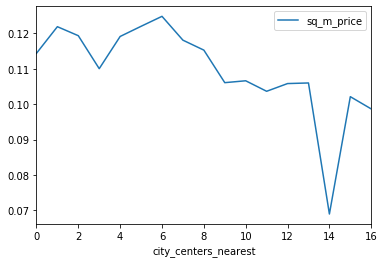

In [63]:
# график зависимости цены квадратного метра жилья от удалённости от центра внутри города Санкт-Петербург
other_data = bitter_data.query('city_centers_nearest < 17')
other_data = other_data.pivot_table(index= 'city_centers_nearest', values='sq_m_price')
other_data.plot() 

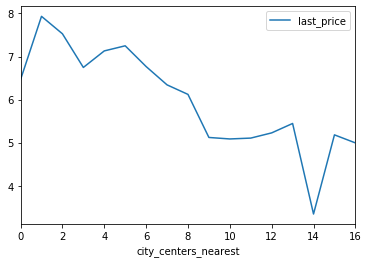

In [64]:
# версия предыдущего графика с ценами квартир
other_data = bitter_data.query('city_centers_nearest < 17')
other_data = other_data.pivot_table(index= 'city_centers_nearest', values='last_price')
other_data.plot() 

Графики очень чётко показывают границу города - 14 км от центра города Санкт-Петербург. 

Также отчётливо виден перелом графиков на отметке 8 км от центра города. 

Таким образом, радиус центра города с точки зрения цены на жильё составляет 8 км.

In [65]:
# характеристики квартир в центре города
center_data = bitter_data.query('city_centers_nearest < 8')
print('Медианная площадь', center_data['total_area'].median())
print('Медианная цена', center_data['last_price'].median())
print('Медианное количество комнат', center_data['rooms'].median())
print('Медианная высота потолков', center_data['ceiling_height'].median())
print('Медианный этаж', center_data['floor'].median())
print('Медианный год размещения объявления', center_data['year'].median())

display(center_data.head())

Медианная площадь 58.0
Медианная цена 6.7
Медианное количество комнат 2.0
Медианная высота потолков 2.65
Медианный этаж 4.0
Медианный год размещения объявления 2017.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort,month,year
94,3,3.5,29.5,2019-04-26,1,2.50,5.0,15.6,2,False,...,0,0.5,4.0,4,0.118644,0.528814,0.186441,другой,4,2019
99,32,9.6,90.0,2017-09-26,4,2.65,5.0,67.0,2,False,...,0,0.5,104.0,1,0.106667,0.744444,0.088889,другой,9,2017
111,4,4.6,40.0,2017-05-29,1,2.65,6.0,18.0,1,False,...,0,0.5,31.0,0,0.115000,0.450000,0.250000,первый,5,2017
138,8,4.8,40.0,2017-11-18,2,2.65,3.0,29.0,2,False,...,2,0.7,80.0,5,0.120000,0.725000,0.150000,другой,11,2017
141,8,6.5,32.6,2019-02-27,1,2.65,5.0,18.5,5,False,...,0,0.5,65.0,2,0.199387,0.567485,0.168712,последний,2,2019


In [66]:
# характеристики квартир в вне центра города
out_center_data = bitter_data.query('city_centers_nearest > 8 and city_centers_nearest < 17')
print('Медианная площадь', out_center_data['total_area'].median())
print('Медианная цена', out_center_data['last_price'].median())
print('Медианное количество комнат', out_center_data['rooms'].median())
print('Медианная высота потолков', out_center_data['ceiling_height'].median())
print('Медианный этаж', out_center_data['floor'].median())
print('Медианный год размещения объявления', out_center_data['year'].median())

display(out_center_data.head())

Медианная площадь 46.0
Медианная цена 4.1
Медианное количество комнат 2.0
Медианная высота потолков 2.65
Медианный этаж 5.0
Медианный год размещения объявления 2018.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,sq_m_price,living_vs_total,kitchen_vs_total,floor_sort,month,year
5,10,2.9,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,0.5,55.0,0,0.095395,0.473684,0.299342,другой,9,2018
8,20,2.9,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,0.5,189.0,2,0.087455,0.465320,0.265682,другой,5,2018
9,18,5.4,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,0.5,289.0,6,0.088525,0.714754,0.106557,другой,2,2017
10,5,5.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,2,0.6,137.0,3,0.126263,0.512626,0.214646,другой,11,2017
12,10,3.9,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,...,0,0.5,90.0,3,0.072222,0.555556,0.166667,последний,6,2016


Сравнение характеристик квартир в центре Санкт-Петрбурга (в радиусе 8 км от центра) и вне центра города показало:

- в центре города квартиры большей площади, дороже, продавались в основном в 2017 году (вспоминая графики выше - в период медленного роста цен на жильё), вне центра города квартиры чаще продавались в 2018 году; 

- количество комнат и высота потолков не отличаются; 

- этаж квартиры вне центра города в основном немного выше, чем в центре. Это может объясняться преобладанием высотных домов вне центра города. 

Факторы, влияющие на цену квартиры описаны выше в рассчётах коэффициентов корреляции, при постороении графиков зависимости цены от удалённости.

## Общий вывод

Проведено исседование таблицы с данными объявлений о продаже квартир в Ленинградской области

В исходных данных не доставало значительной доли характеристик квартир. Дополнение недостающих данных не всегда правомерно, не необходимо, часто факультативно. Дополненные данные могли исказить общую картину исследования, но не могли исказить общий тренд и выводы исследования. К таким недостающим данным отношу высоту потолков, этажность дома и др.

Некая доля данных в исходной таблице аномальны - следствие неправильной записи, искажений, повреждений, умышленной порчи и/или иное. 

Часть результатов исследований ожидаемо показала отстутвие необходимости углублённо изучать данную область. Например, взаимосвязь влияния дня недели подачи объявления на другие характеристики, на итоговую цену квартиры. 

После отсеивания аномалий и невосполнимых пропущенных значений полученные данные и зависимости отвечают принципу адекватности и здравому смыслу: квартиры в центре дороже, в отдалённых деревнях дешевле, чем больше площадь, тем выше цена и пр.